# HEART DISEASE DATA ANALYSIS

Team Members:
1. CHRIS VINOD KURIAN (22070126028)
2. GAURAV PRAKASH (22070126039)

Streamlit APP LINK : https://heart-disease-prediction-cvk.streamlit.app/

## Purpose
The purpose of analysing this dataset is to find useful insights and patterns regarding heart diseases. By exploring this data, we will shed light into critical factors that raise the risk of heart diseases. In order to support early identification of diseases, we aim to reveal hidden patterns, correlations and possible risk factors by leveraging statistical approach, data visualization and analytical tools. 

## Preparation
For preparation lets first import all the necessary libraries and load the files required for the analysis

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

Combining 3 datasets:

We have taken the data from 2 kaggle datasets and 1 dataset from IEEE Dataport and combined it.

In [2]:
df1 = pd.read_csv("heart.csv")
df2 = pd.read_csv('heart(1).csv')
df3 = pd.read_csv("heart(2).csv")
df = pd.concat([df1, df2, df3], ignore_index=True)

In [3]:
df.shape

(2518, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2518 non-null   int64  
 1   sex       2518 non-null   int64  
 2   cp        2518 non-null   int64  
 3   trestbps  2518 non-null   int64  
 4   chol      2518 non-null   int64  
 5   fbs       2518 non-null   int64  
 6   restecg   2518 non-null   int64  
 7   thalach   2518 non-null   int64  
 8   exang     2518 non-null   int64  
 9   oldpeak   2518 non-null   float64
 10  slope     2518 non-null   int64  
 11  ca        1328 non-null   float64
 12  thal      1328 non-null   float64
 13  target    2518 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 275.5 KB


From this we can see that there are some null values present in this dataset and most of the values are integers.

### Dataset Description

Variables Used:
* Age : age of the patient 
* Sex : gender of the patient (1=male and 0=female)
* Cp : chest pain in categories [0-3]
* Trestbps : Resting time systolic blood pressure in mm Hg
* Chol : Serum cholesterol level in mg/dl
* Fbs : Categorical variable to check whether the fasting blood sugar is greater than 120 mg/dl (1 = True, 0 = False)
* Rest_ecg : Resting electrographic results in categories [0-2] 

    0 = normal, 

    1 = having ST-T wave abnormality, 
    
    2 = showing probable or definite left ventricular hypertrophy
* Thalach : Maximum heart rate achieved in beats/min
* Exang : exercise induced angina (1 = Yes, 0 = No)
* Oldpeak: ST depression induced by exercise relative to rest
* Slope: The slope of the peak exercise ST segment in categories [0-2] 
    
    0 = Downsloping 
    
    1=Flat 
    
    2=Upsloping
* Ca : Number of major blood vessels coloured by fluoroscopy in categories [0-4]
* Thal : Category for presence of thalassemia 
    
    0 = fixed defect (no blood flow in some part of the heart) 
    
    1 = normal blood flow 
    
    2 = reversible defect (a blood flow is observed but it is not normal)
* Target : Categorical variable to show the presence of heart disease (1 = Yes, 0 = No)

From the above decription we can understand that there are 9 categorical variables and 5 non-categorical variables. 

Now, lets see the statistics of the non-categorical data

In [5]:
df_non_categorical = df[['age','chol','trestbps','oldpeak','thalach']]
df_non_categorical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2518.0,54.088562,9.212696,28.0,47.0,55.0,61.0,77.0
chol,2518.0,229.190230,81.129536,0.0,203.0,234.0,273.0,603.0
trestbps,2518.0,131.869341,17.922027,0.0,120.0,130.0,140.0,200.0
oldpeak,2518.0,0.997379,1.134041,-2.6,0.0,0.8,1.6,6.2
thalach,2518.0,144.744639,24.665975,60.0,126.0,147.0,163.0,202.0


### Data Preprocessing

Checking for null values

In [6]:
df.isna().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca          1190
thal        1190
target         0
dtype: int64

We can see that columns 'ca' and 'thal' have more than 40 percent of their data as null values. We cleaned them by removing these columns.

In [7]:
del df['ca']
del df['thal']

Since most of the the datasets were subsets or parts taken from a UCI repository, lots of duplicate data might be present. Hence we cleaned it by removing duplicate values.

In [8]:
df = df.drop_duplicates()

Now we have a cleaned data with 1220 rows and 12 columns.

In [9]:
df.shape

(1220, 12)

### Correlation Heat Map

Now let's check the correlation between the different columns.

<AxesSubplot: >

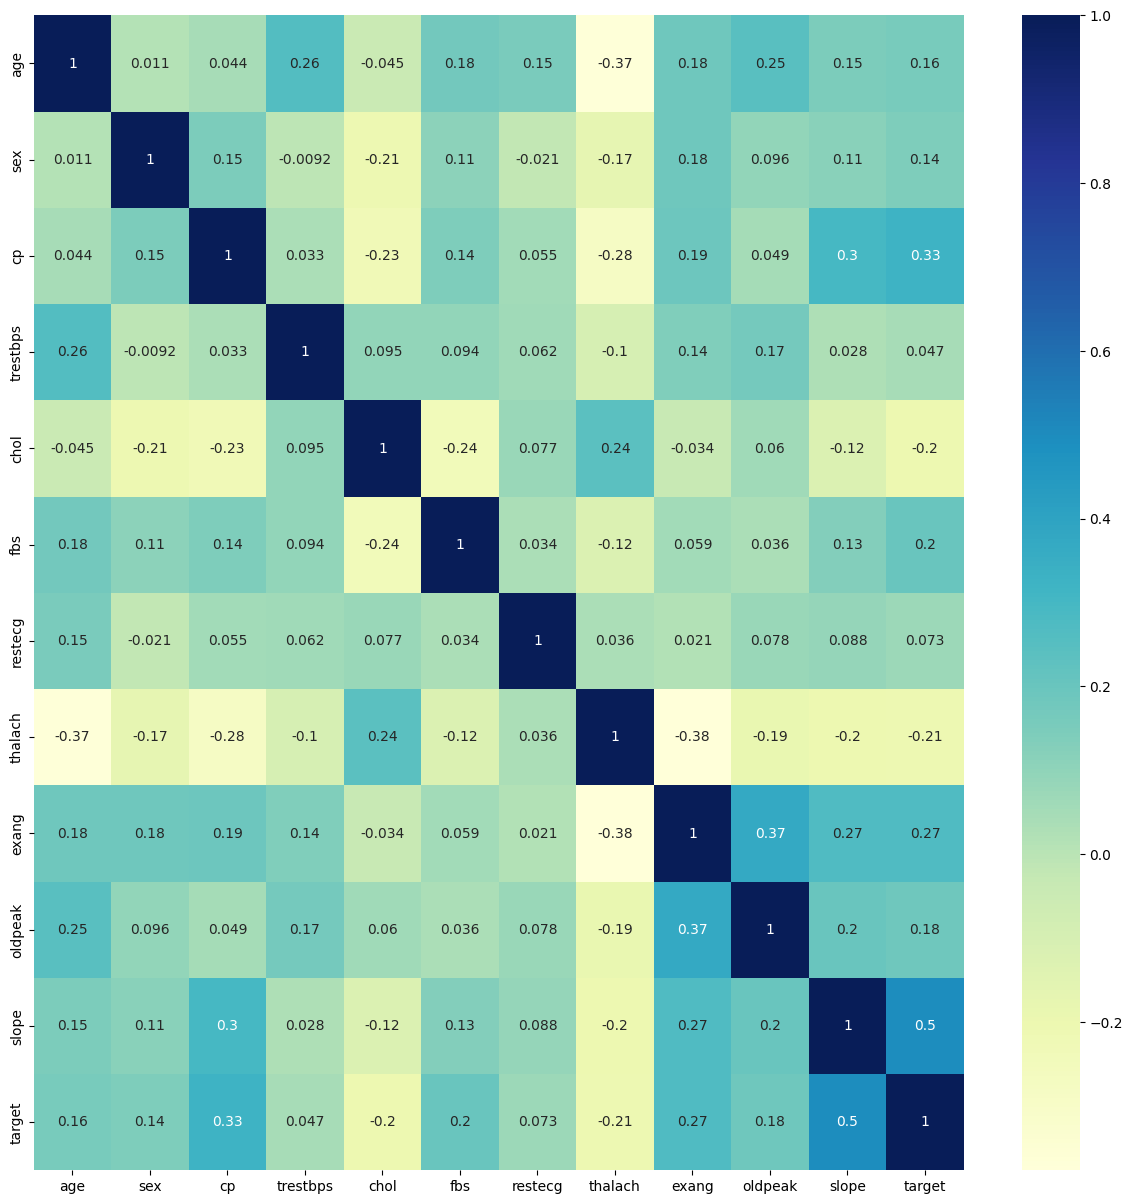

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True)

From the correlation heatmap it is clear that almost all the columns of data are uncorrelated. But comparing all the columns wit respect to the target variable it's also notable that slope has the highest correlation coefficient with a value of 0.5. 

## EDA

### Barplot of Age VS Number of Heart Patients
Now lets look how the number of heart patiensts are distributed in terms of age

In [11]:
df1 = df[['age', 'target']]
df1 = df1[df1['target']==1]
df1 = pd.DataFrame(df1.groupby('age')['target'].count())

fig = px.bar(df1, x=df1.index, y="target", color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Number of Heart Patients",
    title="Number of Heart Patients VS Age"
)
fig.update_layout(title_x=0.5)
fig.show()

### Box Plots of the Non Categorical Variables

In [12]:
for i in df_non_categorical.columns:
    fig = px.box(df_non_categorical[i], title=f'Boxplot of {i}')
    fig.update_layout(
        yaxis_title='Values',
        xaxis_title=f'{i}',
        showlegend=False 
    )
    fig.show()



From the above box plot we can visualize the range of the values and outliers present in all these non-categorical data.

We can also notice that there is an incorrect data in trestbps column with value 0, since no patient unless dead have 0 trestbps. So we remove that outlier.

In [13]:
df = df[df['trestbps'] != 0]
df.shape

(1219, 12)

### Joint-Plot of Age VS Systolic Blood Pressure in Heart Patients


<Figure size 2000x2000 with 0 Axes>

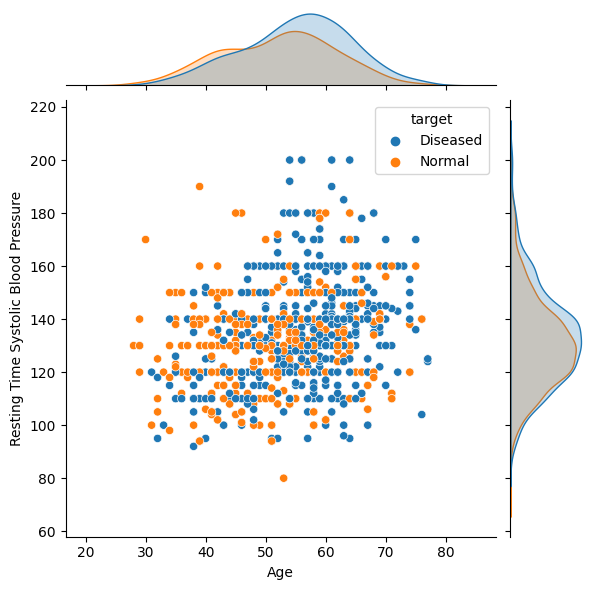

In [14]:
df2 = df[['age', 'trestbps','target']]
df2['target'] = df2['target'].map({1:'Diseased', 0:'Normal'})

plt.figure(figsize = (20, 20))

sns.jointplot(data = df2, x ='age', y ='trestbps', kind='scatter', hue='target')
plt.xlabel('Age')
plt.ylabel('Resting Time Systolic Blood Pressure')
plt.show()

From the above joint plot we can see the distribution of Systolic Blood Pressure with respect to age in both Diseased and Normal patients.

### Histogram of Patients VS Cholesterol Level

In [15]:
df3 = df[['chol', 'target']]
df3['target'] = df3['target'].map({1:'Diseased', 0:'Normal'})

fig = px.histogram(df3, x='chol', color='target', title='Cholesterol Level Distribution', labels={'x': 'Count'})

fig.show()

From cholesterol level distribution we can see the number of patients in different levels of cholesterol

### Piechart

In [16]:
df4 = df[['sex', 'target']]

df4['sex'] = df4['sex'].map({1:'Male', 0:'Female'})
df4['target'] = df4['target'].map({1:'Diseased', 0:'Normal'})

# Count the gender distribution
gender_distribution = df4.value_counts().reset_index()
gender_distribution.columns = ['Gender','Target','Count']

gender_distribution['Patients'] = gender_distribution['Target']+ " " + gender_distribution['Gender']

fig = px.pie(gender_distribution, values='Count', names='Patients',
             title='Distribution of Patients by Gender')

fig.update_layout(title_x=0.5)

fig.show()

From the above pie chart we can see that most number of heart diseased patients are males. 

We can see that the male to female ratio in this dataset is poor.

### Barchart

In [17]:
import plotly.express as px

df4 = df[['thalach', 'target']].copy()

df4['target'] = df4['target'].map({1:'Disease', 0:'Normal'})

fig = px.histogram(df4, x='thalach', color='target', facet_col='target',
             barmode='group',
             title='Maximum Heart Rate of patients with/without Heart Disease',
             labels={'thalach': 'Maximum Heart Rate', 'target': 'Target'},
             color_discrete_map={'No Disease': '#54A24B', 'Disease': '#AF0038'},
                  )

fig.update_layout(title_x=0.5)

fig.show()


In the above histograms we can the trend of maximum heart rate in diseased and normal patients. 

## KNN Classification


In [18]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from collections import Counter

Through trial and errors we found that by removing the columns of exang and oldpeak the accuracy increases.

In [19]:
del df['exang']
del df['oldpeak']

Feature selection is done and features are converted into X variable and target is saved into y variable.

In [20]:
features = df.columns[0:9].values.tolist()
x = df[features].to_numpy()
y = df['target'].to_numpy()

Splitting the data into training and testing data.

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1, random_state=100)

Checking training score and accuracy score to find ideal number of neighbours for KNN classifier

In [22]:
k = np.arange(1,200,21)

train_score = []
accuracy_set = []

for i in k:
  model = knn(n_neighbors=i)
  model.fit(X_train,Y_train)
  train_score.append(model.score(X_train, Y_train))
  y_test_pred = model.predict(X_test)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  accuracy_set.append(accuracy)

Visualizing Training accuracy and Testing Accuracy

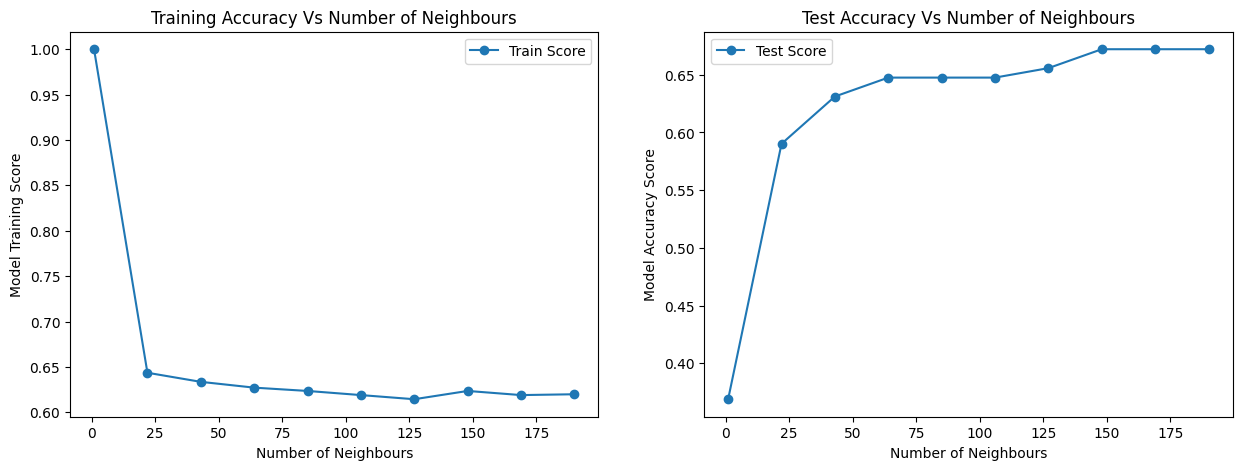

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(k, train_score, label='Training Score', marker='o')
plt.title("Training Accuracy Vs Number of Neighbours")
plt.ylabel("Model Training Score")
plt.xlabel("Number of Neighbours")
plt.legend(['Train Score'])

plt.subplot(122)
plt.plot(k, accuracy_set, label='Training Score', marker='o')
plt.title("Test Accuracy Vs Number of Neighbours")
plt.ylabel("Model Accuracy Score")
plt.xlabel("Number of Neighbours")
plt.legend(['Test Score'])

plt.show()


In [24]:
model  = knn(n_neighbors=141)

model = model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

### Accuracy

In [25]:
accuracy = accuracy_score(Y_test,y_pred)*100
accuracy

68.0327868852459

### Precision

In [26]:

precision = precision_score(Y_test, y_pred, average='binary')
precision

0.7627118644067796

### Recall


In [27]:

recall = recall_score(Y_test, y_pred, average='binary')
recall

0.6428571428571429

### F1 Score

In [28]:

f1score = f1_score(Y_test, y_pred)
f1score

0.6976744186046511

### Jaccards Index

In [29]:

jaccard = jaccard_score(Y_test, y_pred, average='binary')
print(f"Jaccard Score: {jaccard}")

Jaccard Score: 0.5357142857142857


### AUC-ROC Curve

Visualizing Area Under Receiver Operator Characteristic Curve to evaluate how good the model is.

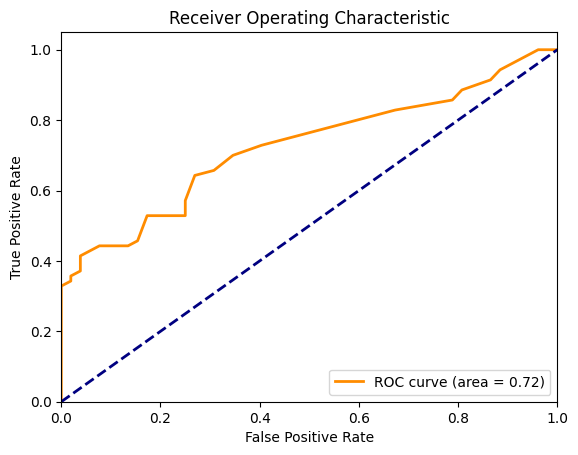

In [30]:
y_scores = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

auc_roc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
fig1 = plt.gcf()
fig1.show()

### Confusion Matrix

In [31]:

confusion = pd.DataFrame(confusion_matrix(Y_test, y_pred), columns=['Negative','Positive',], index=['Negative','Positive'])
confusion

,Negative,Positive
Negative,38,14
Positive,25,45


### True Positive Rate

In [32]:
tp = confusion.loc['Positive']['Positive']
fn = confusion.loc['Negative']['Positive']
true_pos_rate = tp/(tp+fn)
true_pos_rate

0.7627118644067796

### False Positive Rate

In [33]:
tn = confusion.loc['Negative']['Negative']
fp = confusion.loc['Positive']['Negative']

false_pos_rate = fp/(fp+tn)
false_pos_rate

0.3968253968253968

In [34]:
gini_index = 0

for i in range(len(X_test)):
    dist, indices = model.kneighbors([X_test[i]], n_neighbors=3)
    neighbor_labels = Y_train[indices[0]]

    class_counts = Counter(neighbor_labels)

    # Calculating gini impurity
    gini_impurity = 1 - sum((class_counts[classes] / len(neighbor_labels)) ** 2 for classes in set(neighbor_labels))

    gini_index += gini_impurity * len(neighbor_labels)

# Normalizing the Gini index
gini_index /= len(X_test)

# Print the Gini index
print("Gini Index:", gini_index)

Gini Index: 1.0163934426229495


## KNN Classification Report

Compiled Classification Report for Easy Visualization

In [35]:
print("Classification report of KNN Classifier \n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1score}")
print(f"Jaccard Score: {jaccard}")
print(f"Gini Index: {gini_index}\n")
print("Confusion Matrix:\n",confusion)
print('\nTrue Positive Rate is: ',true_pos_rate)
print("False Positive Rate is: ", false_pos_rate)

Classification report of KNN Classifier 

Accuracy: 68.0327868852459
Precision: 0.7627118644067796
Recall: 0.6428571428571429
F1 Score: 0.6976744186046511
Jaccard Score: 0.5357142857142857
Gini Index: 1.0163934426229495

Confusion Matrix:
           Negative  Positive
Negative        38        14
Positive        25        45

True Positive Rate is:  0.7627118644067796
False Positive Rate is:  0.3968253968253968


## Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
features = df.columns[0:9].values.tolist()
x = df[features].to_numpy()
y = df['target'].to_numpy()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1, random_state=100)

In [39]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

In [40]:
y_pred = gnb.predict(X_test)

### Accuracy

In [41]:
accuracy = accuracy_score(Y_test,y_pred)*100
accuracy

75.40983606557377

### Precision

In [42]:
precision = precision_score(Y_test, y_pred, average='binary')
precision

0.8125

### Recall


In [43]:
recall = recall_score(Y_test, y_pred, average='binary')
recall

0.7428571428571429

### F1 Score

In [44]:
f1score = f1_score(Y_test, y_pred)
f1score

0.7761194029850748

### Jaccards Index

In [45]:
jaccard = jaccard_score(Y_test, y_pred, average='binary')
print(f"Jaccard Score: {jaccard}")

Jaccard Score: 0.6341463414634146


### AUC-ROC Curve

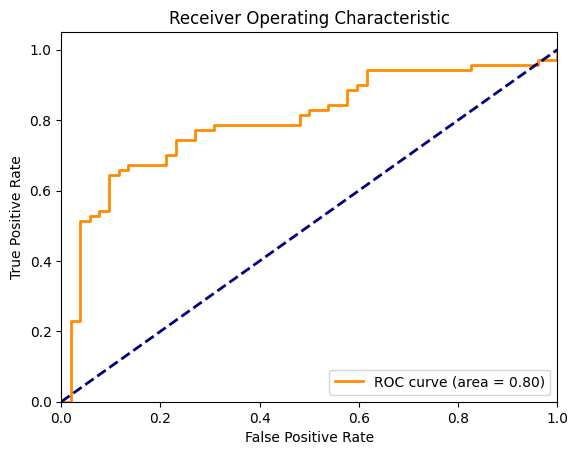

In [46]:
y_scores = gnb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

auc_roc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [47]:
confusion = pd.DataFrame(confusion_matrix(Y_test, y_pred), columns=['Negative','Positive',], index=['Negative','Positive'])
confusion

,Negative,Positive
Negative,40,12
Positive,18,52


### True Positive Rate

In [48]:
tp = confusion.loc['Positive']['Positive']
fn = confusion.loc['Negative']['Positive']
true_pos_rate = tp/(tp+fn)
true_pos_rate

0.8125

### False Positive Rate

In [49]:
tn = confusion.loc['Negative']['Negative']
fp = confusion.loc['Positive']['Negative']

false_pos_rate = fp/(fp+tn)
false_pos_rate

0.3103448275862069

### Gini Index

In [50]:
y_probs = gnb.predict_proba(X_test)

gini_index = 0

for i in range(len(X_test)):
    predicted_probabilities = y_probs[i]
    predicted_class = y_pred[i]

    # Calculate Gini impurity
    gini_impurity = 1 - sum(p ** 2 for p in predicted_probabilities)

    # Multiply the Gini impurity by 2
    gini_index += gini_impurity * 2

# Normalize the Gini index by dividing by the total number of test samples
gini_index /= len(X_test)

# Print the Gini index
print("Gini Index:", gini_index)


Gini Index: 0.4508034296219694


## Naive Bayes Classification Report

Compiled Classification Report for Easy Visualization

In [51]:
print("Classification report of Naive Bayes Classifier \n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1score}")
print(f"Jaccard Score: {jaccard}")
print(f"Gini Index: {gini_index}\n")
print("Confusion Matrix:\n",confusion)
print('\nTrue Positive Rate is: ',true_pos_rate)
print("False Positive Rate is: ", false_pos_rate)

Classification report of Naive Bayes Classifier 

Accuracy: 75.40983606557377
Precision: 0.8125
Recall: 0.7428571428571429
F1 Score: 0.7761194029850748
Jaccard Score: 0.6341463414634146
Gini Index: 0.4508034296219694

Confusion Matrix:
           Negative  Positive
Negative        40        12
Positive        18        52

True Positive Rate is:  0.8125
False Positive Rate is:  0.3103448275862069


## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)

In [53]:
features = df.columns[0:9].values.tolist()
x = df[features].to_numpy()
y = df['target'].to_numpy()

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.1, random_state=100)

In [55]:
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)

### Accuracy

In [56]:
accuracy = accuracy_score(Y_test,y_pred)*100
accuracy

77.8688524590164

### Precision

In [57]:
precision = precision_score(Y_test, y_pred, average='binary')
precision

0.7945205479452054

### Recall


In [58]:
recall = recall_score(Y_test, y_pred, average='binary')
recall

0.8285714285714286

### F1 Score

In [59]:
f1score = f1_score(Y_test, y_pred)
f1score

0.8111888111888111

### Jaccards Index

In [60]:
jaccard = jaccard_score(Y_test, y_pred, average='binary')
print(f"Jaccard Score: {jaccard}")

Jaccard Score: 0.6823529411764706


### AUC-ROC Curve

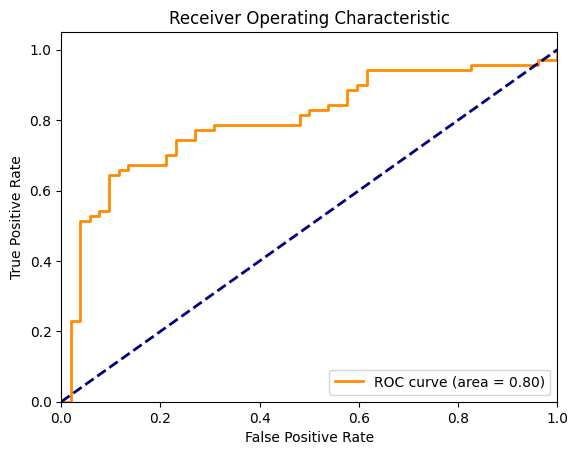

In [61]:
y_scores = gnb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

auc_roc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [62]:
confusion = pd.DataFrame(confusion_matrix(Y_test, y_pred), columns=['Negative','Positive',], index=['Negative','Positive'])
confusion

,Negative,Positive
Negative,37,15
Positive,12,58


### True Positive Rate

In [63]:
tp = confusion.loc['Positive']['Positive']
fn = confusion.loc['Negative']['Positive']
true_pos_rate = tp/(tp+fn)
true_pos_rate

0.7945205479452054

### False Positive Rate

In [64]:
tn = confusion.loc['Negative']['Negative']
fp = confusion.loc['Positive']['Negative']

false_pos_rate = fp/(fp+tn)
false_pos_rate

0.24489795918367346

### Gini Index

In [65]:
gini_index = 0

for i in range(len(X_test)):
    predicted_probabilities = y_probs[i]
    predicted_class = y_pred[i]

    # Calculate Gini impurity based on predicted probabilities
    gini_impurity = 1 - sum(p ** 2 for p in predicted_probabilities)

    # Multiply the Gini impurity by 2 and add it to the Gini index
    gini_index += gini_impurity * 2

# Normalize the Gini index by dividing by the total number of test samples
gini_index /= len(X_test)

# Print the Gini index
print("Gini Index:", gini_index)

Gini Index: 0.6554972461031848


## Logistic Regression Classification Report

Compiled Classification Report for Easy Visualization

In [66]:
print("Classification report of Logistic Regression Classifier \n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1score}")
print(f"Jaccard Score: {jaccard}")
print(f"Gini Index: {gini_index}\n")
print("Confusion Matrix:\n",confusion)
print('\nTrue Positive Rate is: ',true_pos_rate)
print("False Positive Rate is: ", false_pos_rate)

Classification report of Logistic Regression Classifier 

Accuracy: 77.8688524590164
Precision: 0.7945205479452054
Recall: 0.8285714285714286
F1 Score: 0.8111888111888111
Jaccard Score: 0.6823529411764706
Gini Index: 0.6554972461031848

Confusion Matrix:
           Negative  Positive
Negative        37        15
Positive        12        58

True Positive Rate is:  0.7945205479452054
False Positive Rate is:  0.24489795918367346


# Model Deployment

Model has been deployed on Streamlit. 
Streamlit APP LINK : https://heart-disease-prediction-cvk.streamlit.app/